# Polynomial Regression

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import operator

%matplotlib inline

To understand the need for polynomial regression, let’s generate some random dataset first.

f(x) = x-2x^2+1/2x^3

In [2]:
def generate_dataset():
    np.random.seed(0)
    x = 2 - 3 * np.random.normal(0, 1, 20)
    y = x - 2 * (x **2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

    # Transform the data to include another axis
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]

    return x, y


Let’s apply a linear regression model to this dataset.

Root Mean Squared Error:  15.908242501429998
R2 Score:  0.5775207535924736


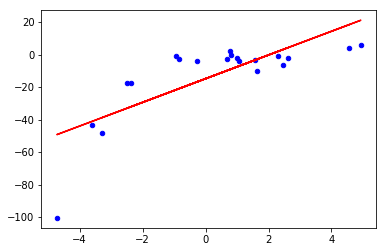

In [3]:
np.random.seed(0)
rn = np.random.normal(0, 1, 20)
x = 2-3*rn
y = 2 - 2*(x**2) + 0.5*(x**3) + np.random.normal(-3, 3, 20)

# Transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()

model.fit(x, y)
y_pred = model.predict(x)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("Root Mean Squared Error: ", rmse)
print('R2 Score: ', r2)

plt.scatter(x, y, s=20, c='b')
plt.plot(x, y_pred, 'r')
plt.show()

We can see that the straight line is unable to capture the patterns in the data. This is an example of under-fitting. 

Computing the RMSE and R²-score of the linear line gives:

- Root Mean Squared Error:  **15.908242501429998**
- R2 Score:  **0.5775207535924736**


### To overcome under-fitting, we need to increase the complexity of the model.

To generate a higher order equation we can add powers of the original features as new features. 

The linear model,


can be transformed to



This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.


To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. Next, we train the model using Linear Regression.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import operator

%matplotlib inline

np.random.seed(0)
rn = np.random.normal(0, 1, 20)
x = 2-3*rn
y = 2 - 2*(x**2) + 0.5*(x**3) + np.random.normal(-3, 3, 20)

# Transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

def polynomial_reg(x, y, degree):
    
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    # print(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
    r2 = r2_score(y, y_poly_pred)

    print("Root Mean Squared Error: ", rmse)
    print('R2 Score: ', r2)

    plt.scatter(x, y, s=20, c='b')

    # Sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)

    x, y_poly_pred = zip(*sorted_zip)

    plt.plot(x, y_poly_pred, color='m')
    plt.show()


Root Mean Squared Error:  15.908242501429996
R2 Score:  0.5775207535924736


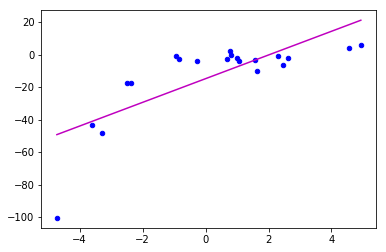

In [5]:
polynomial_reg(x, y, 1)

Root Mean Squared Error:  3.4498955074087245
R2 Score:  0.9801311442523576


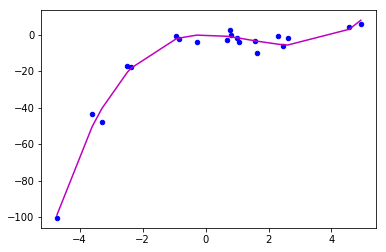

In [13]:
polynomial_reg(x, y, 3)

If we further increase the degree to 20, we can see that the curve passes through more data points.

Root Mean Squared Error:  1.1136435371584035
R2 Score:  0.9979296042064327


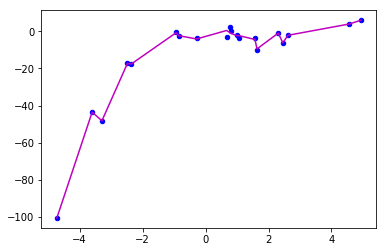

In [7]:
polynomial_reg(x, y, 20)

If we try to fit a cubic curve (degree=6) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots.



### Below is a comparison of curves for degree 3 and 6.

In [17]:
from sklearn.pipeline import make_pipeline

def compare_curves(x, y):
    
    plt.scatter(x, y, s=30, alpha=0.3, c='b')

    for degree in range(3, 8):

        #polynomial_features = PolynomialFeatures(degree=degree)
        #x_poly = polynomial_features.fit_transform(x)

        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

        model.fit(x, y)
        y_poly_pred = model.predict(x)

        rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
        r2 = r2_score(y, y_poly_pred)

        print("Root Mean Squared Error: ", rmse)
        print('R2 Score: ', r2)

        # Sort the values of x before line plot
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)

        x, y_poly_pred = zip(*sorted_zip)

        plt.plot(x, y_poly_pred, label="degree %d" % degree)

    plt.legend()

    plt.xlabel("X")

    plt.ylabel("Y")

    plt.title("Polynomial Regression")
    plt.tight_layout()

    plt.show()



Root Mean Squared Error:  3.4498955074087245
R2 Score:  0.9801311442523576
Root Mean Squared Error:  21.34618763389033
R2 Score:  0.23932066233914662
Root Mean Squared Error:  20.44454136113332
R2 Score:  0.30222449586033584
Root Mean Squared Error:  17.50861004285016
R2 Score:  0.48824238385142715
Root Mean Squared Error:  12.579863314963102
R2 Score:  0.7358121629526302


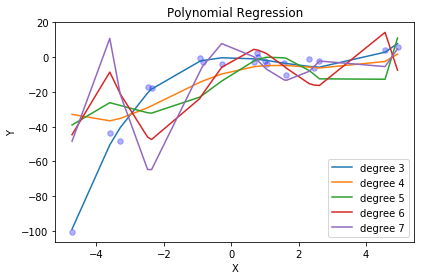

In [18]:
compare_curves(x, y)

For degree=4, 5, 6, 7, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

#### To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized.
( Note: adding more data can be an issue if the data is itself noise).

## The Bias vs Variance trade-off

**Bias** refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in **under-fitting**.

**Variance** refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in **over-fitting** the data.


The below picture summarizes our learning.


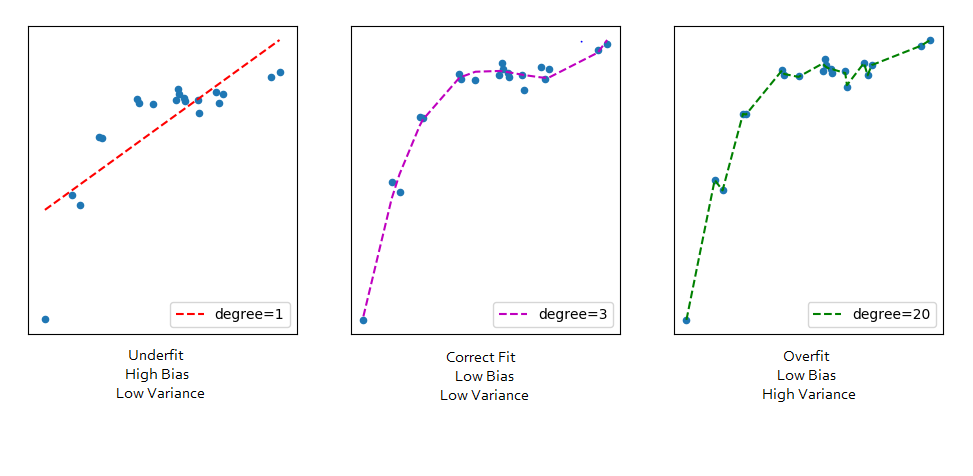

From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

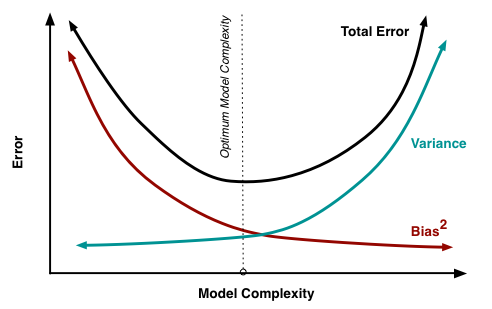